# SARS-COV-2  (COVID-19) Analysis & Prediction

##### Author: Dionisis Mastavrslis
     - Email:    dionisis.mastavralis@gmail.com
     - GitHub:   https://github.com/mastavralis/dm-covid-19-greece
     - License:  About the Analysis and Prediction Model: All Rights Reserved.

###### About the DATA
- Data Authority: JOHNS HOPKINS UNIVERSITY AND MEDICINE
- Data Source: https://github.com/CSSEGISandData/COVID-19
- Data renewal frequency: Daily at 23:59 by JOHNS HOPKINS


+ Data Prediction Methods
    - Linear Regression
    - Polynomial Rregression

###### Notes:
* The analysis is customized to read, analyze and predict data only for Greece. However, changing the "country" parameter on In [139] the Model can fetch and analyze data for other countries as well, but with a probability of wrong data visualization or a
malfunction of the Model. Thus, it is not recommended by the author to perform analysis for other countries but Greece.

###### Daily Reports
- For Reports & Predictions history, check the Readme.md File of the Repo.
- Current Report [2020-04-14](https://github.com/mastavralis/dm-covid-19-greece/blob/master/14-4-2020-report/main.md)

In [67]:
# import all the required libs
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To loop through all the csv files in the csse_covid_19_daily_reports folder
import glob
from __future__ import absolute_import, division, print_function, unicode_literals
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Create the Data frame from the Data set

In [68]:
# Read all the csv files from the daily report folder
files = glob.glob('../COVID-19_DATA/csse_covid_19_data/csse_covid_19_daily_reports/*.csv')

daily_reports = []

for fname in files:
    # create a dataframe for every csv
    df = pd.read_csv(fname, index_col=None, header=0)
    # append dataframes into a new DF
    daily_reports.append(df)

# Concatenate the dataframes
new_df = pd.concat(daily_reports, axis=0, ignore_index=True, sort=False)

# Correct the Country/Region and Country_Region column issue into a new column 'Country'
new_df.loc[new_df['Country_Region'].isnull() == True, 'Country'] = new_df['Country/Region']
new_df.loc[new_df['Country/Region'].isnull() == True, 'Country'] = new_df['Country_Region']
# Correct Last Update columns
new_df.loc[new_df['Last Update'].isnull() == True, 'Date'] = new_df['Last_Update']
new_df.loc[new_df['Last_Update'].isnull() == True, 'Date'] = new_df['Last Update']

### Remove unnecessary columns

In [69]:
new_df.drop(['Admin2', 'Combined_Key', 'Country/Region', 
             'Country_Region', 'FIPS', 'Lat', 
             'Latitude', 'Long_', 'Longitude', 
             'Province/State', 'Province_State'], axis=1, inplace=True)

### Create DataFrame by country for Specific Analysis
* About the compatible Countries, please advise the notes section of this Notebook

#### Confirmed Cases
* Greece is the default country. Changing country might break the anaysis model.

In [70]:
country = 'Greece'
country_df = new_df.loc[new_df['Country'] == country]
date_time = pd.to_datetime(country_df['Date'])
# Remove the year from the DataFrme
# months_only = date_time
#months_only = months_only.astype(str).str.replace("2020-", "").str.split().str[0]

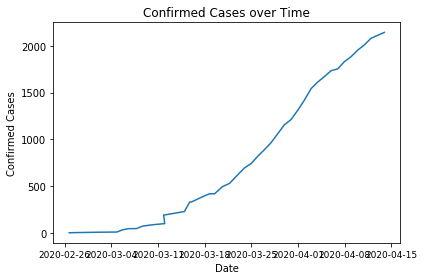

In [71]:
plt.xlabel('Date')
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases over Time")
# plt.plot(country_df['Confirmed'])
plt.plot(date_time, country_df['Confirmed'])
#set parameters for tick labels
# plt.xticks(date_time, [str(i) for i in country_df['Confirmed'] ], rotation=90)
plt.tick_params(axis='x', which='major', labelsize=9)
plt.tight_layout()

### Confrimed Cases so far

In [72]:
current_day = country_df.iloc[[-1,]]
print("Confirmed Cases Today {0}:".format(current_day['Confirmed'].values[0]))

Confirmed Cases Today 2145.0:


### Deaths so far

In [73]:
current_day = country_df.iloc[[-1,]]
print("Deaths Today {0}:".format(current_day['Deaths'].values[0]))

Deaths Today 99.0:


### Deaths and Death Ratio

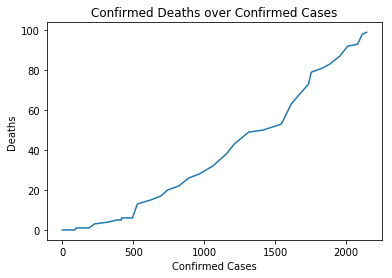

In [74]:
plt.xlabel('Confirmed Cases')
plt.ylabel("Deaths")
plt.title("Confirmed Deaths over Confirmed Cases")
plt.plot(country_df['Confirmed'], country_df['Deaths'])
plt.show()

### Mortality Rate

In [75]:
# Death Ratio
# Always get the last Row of the dataframe
deaths = country_df.loc[country_df.index[-1], "Deaths"]
cases = country_df.loc[country_df.index[-1], "Confirmed"]
dr = round((deaths / cases) * 100, 2)
#print('Mortality Rate is: ', dr, '%')

### Cases vs Deaths

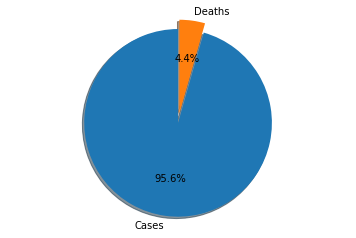

In [76]:
# Pie Chart to show the Mortality rate
labels = ["Cases", "Deaths"]
sizes = [cases, deaths]
explode = (0, 0.1) # only "explode" in the seconds slice "Deaths"
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Active Cases vs Recovered

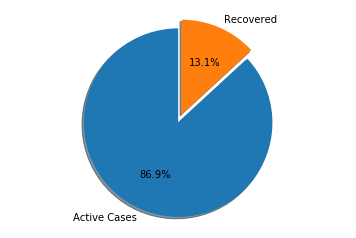

In [77]:
recovered = country_df.loc[country_df.index[-1], "Recovered"]
active = country_df.loc[country_df.index[-1], "Active"]
#
labels = ["Active Cases", "Recovered"]
sizes = [active, recovered]
explode = (0, 0.1) # only "explode" in the seconds slice "Recoverd"
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Show the Daily Cases

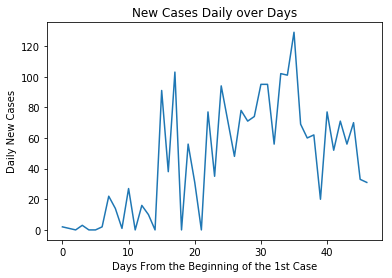

In [78]:
# In case we want to added to the country_df DataFrame
daily_cases = [y - x for x,y in zip(country_df['Confirmed'],country_df['Confirmed'][1:])]
# Append on more record in orde to have the same size and shape
# daily_cases.append(0)

plt.xlabel('Days From the Beginning of the 1st Case')
plt.ylabel('Daily New Cases')
plt.title("New Cases Daily over Days")
plt.plot(daily_cases)
plt.show()

### Perform a very simple Prediction With Machine Learning
- Since Epidemics are not Linear, we are using Polynomial Regression

#### Fit Cases Model

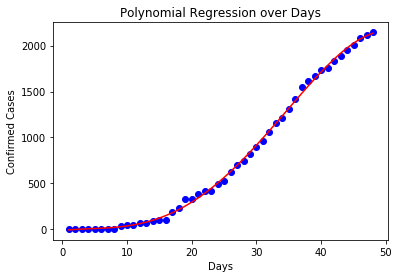

In [79]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

# Days
X = np.arange(1, len(daily_cases)+2).reshape(-1,1)
y = country_df['Confirmed']

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression over Days') 
plt.xlabel('Days') 
plt.ylabel('Confirmed Cases')
plt.show()

#### Predict Cases Model

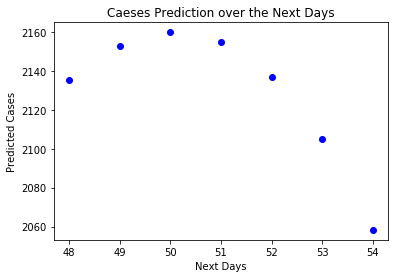

In [80]:
current_day = len(country_df)
days = np.arange(current_day, 55)
pred = []
next_days = []

for i in days:
    next_days.append( lin2.predict(poly.fit_transform([[i]])) )


X = days
y = next_days

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue')

plt.title('Caeses Prediction over the Next Days') 
plt.xlabel('Next Days')
plt.ylabel('Predicted Cases')
plt.show()

###### Predict Cases for Tomorrow (or for a specific Day)

In [81]:
# Predicting a new result with Polynomial Regression
# "next_day" is for today otherwise use an interget number greater tha today day
next_day = len(country_df)+1
prediction = lin2.predict(poly.fit_transform([[next_day]]))
today = datetime.date.today()
# Print the Predicted number rounded
# output0 = "Total Cases Prediction today {0} is {1}".format(today,int(prediction[0]))
output0 = int(prediction[0])

In [82]:
prediction = lin2.predict(poly.fit_transform([[next_day+1]]))
tomorrow = today + datetime.timedelta(days=1)
# Print the Predicted number rounded
# output1 = "Total Cases Prediction tomorrow {0} is {1}".format(tomorrow,int(prediction[0]))
output1 = int(prediction[0])

#### Fit Deaths Model

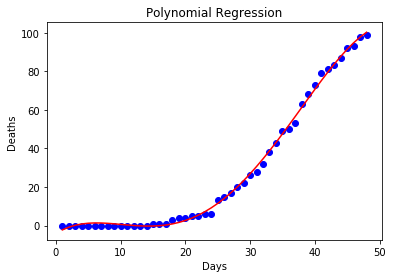

In [83]:
# Days
X = np.arange(1, len(daily_cases)+2).reshape(-1,1)
y = country_df['Deaths']

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Days') 
plt.ylabel('Deaths')
plt.show()

#### Predict Deaths Model

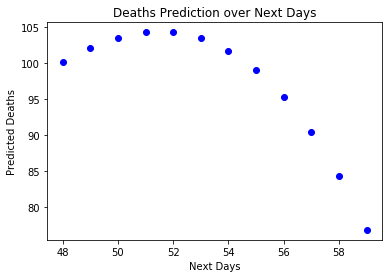

In [84]:
days = np.arange(current_day,60)
pred = []
next_days = []

for i in days:
    next_days.append( lin2.predict(poly.fit_transform([[i]])) )


X = days
y = next_days

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue')

plt.title('Deaths Prediction over Next Days') 
plt.xlabel('Next Days')
plt.ylabel('Predicted Deaths')
plt.show()

###### Predict Deaths for Tomorrow (or for a specific Day)

In [85]:
# Predicting a new result with Polynomial Regression
# "next_day" is for today otherwise use an interget number greater tha today day
next_day = len(country_df)+1
prediction = lin2.predict(poly.fit_transform([[next_day]]))
today = datetime.date.today()
# Print the Predicted number rounded
# output2 = "Total Deaths Prediction today {0} is {1}".format(today,int(prediction[0]))
output2 = int(prediction[0])

In [86]:
prediction = lin2.predict(poly.fit_transform([[next_day+1]]))
tomorrow = today + datetime.timedelta(days=1)
output3 = "Total Deaths Prediction tomorrow {0} is {1}".format(tomorrow,int(prediction[0]))
output3 = int(prediction[0])

# Model Accuracy Evaluation

In [87]:
accur_df = pd.read_csv('dataset/model-accuracy-evaluation.csv', error_bad_lines=False)
accur_df.head(len(accur_df)-1)

,Date,Actual Cases,Cases Prediction,Cases Accuracy,Actual Deaths,Deaths Prediction,Deaths Accuracy
0,5/4/2020,1735.0,1804,0.96,73.0,74,0.99
1,6/4/2020,1755.0,1865,0.94,79.0,79,1.00
2,7/4/2020,1832.0,1891,0.97,81.0,85,0.95
3,8/4/2020,1884.0,1929,0.98,83.0,89,0.93
4,9/4/2020,1955.0,1963,0.99,86.0,91,0.94
5,10/4/2020,2011.0,2005,0.99,90.0,94,0.96
6,11/4/2020,2083.0,2045,0.98,93.0,97,0.96
7,12/4/2020,2114.0,2093,0.99,98.0,98,1.00
8,13/4/2020,2145.0,2128,0.99,99.0,101,0.98


In [88]:
cases_accur = accur_df['Cases Accuracy'] * 100
deaths_accur = accur_df['Deaths Accuracy'] * 100
cases_evaluation = round(cases_accur.sum()/(len(accur_df)-1), 2)
deaths_evaluation = round(deaths_accur.sum()/(len(accur_df)-1), 2)

eval_df = pd.DataFrame(np.array([[cases_evaluation, deaths_evaluation]]),
                   columns=['Cases Prediction Accuracy', 'Deaths Prediction Accuracy'])

output4 = cases_evaluation.astype(str) + ' %'
output5 = deaths_evaluation.astype(str) + ' %'

## Total Model Prediction Accuracy

  + Cases Prediction Accuracy:  **{{output4}}**
  + Deaths Prediction Accuracy: **{{output5}}**

## New Predictions (2020-04-14)

#### Total Cases Prediction

  + Today: **{{output0}}**
  + Tomorrow: **{{output1}}**
  
  
#### Total Death Prediction

  + Today: **{{output2}}**
  + Tomorrow: **{{output3}}**

##### Reports History
- [Reports Hisory](https://github.com/mastavralis/dm-covid-19-greece/blob/master/README.md/#daily-reports)